# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
weather_api_key = "bf69c7688862919e72c881d7356846db"
weather_api_key

'bf69c7688862919e72c881d7356846db'

### Generate the Cities List by Using the `citipy` Library

In [39]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []
#Generate the Cities List by Using the citipy Library
# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)# Dependencies and Setup

lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [40]:
# Set the API base URL
url = base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({ 
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
        
    # If an error is experienced, skip the city
    except:
        #print(f"City not found. Skipping...")
        pass
    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
    
print("Data Retrieval Complete      ")

print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | brisas barra de suchiate
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | nuuk
Processing Record 8 of Set 1 | gorontalo
Processing Record 9 of Set 1 | lihue
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | cable beach
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | baker city
Processing Record 19 of Set 1 | kalabo
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | doma
Processing Record 22 of Set 1 | grytvik

In [41]:
print(len(city_data))  # This should show the number of items in the list
print(city_data[:5])  # This will print the first 5 items in the list


592
[{'City': 'bethel', 'Lat': 42.6001, 'Lng': -73.9662, 'Max Temp': 5.68, 'Humidity': 72, 'Cloudiness': 100, 'Wind Speed': 0.89, 'Country': 'US', 'Date': 1707633456}, {'City': 'albany', 'Lat': 42.6001, 'Lng': -73.9662, 'Max Temp': 5.68, 'Humidity': 72, 'Cloudiness': 100, 'Wind Speed': 0.89, 'Country': 'US', 'Date': 1707633456}, {'City': 'brisas barra de suchiate', 'Lat': 42.6001, 'Lng': -73.9662, 'Max Temp': 5.68, 'Humidity': 72, 'Cloudiness': 100, 'Wind Speed': 0.89, 'Country': 'US', 'Date': 1707633456}, {'City': 'college', 'Lat': 42.6001, 'Lng': -73.9662, 'Max Temp': 5.68, 'Humidity': 72, 'Cloudiness': 100, 'Wind Speed': 0.89, 'Country': 'US', 'Date': 1707633456}, {'City': 'papatowai', 'Lat': 42.6001, 'Lng': -73.9662, 'Max Temp': 5.68, 'Humidity': 72, 'Cloudiness': 100, 'Wind Speed': 0.89, 'Country': 'US', 'Date': 1707633456}]


In [42]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df.count()

city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        592 non-null    object 
 1   Lat         592 non-null    float64
 2   Lng         592 non-null    float64
 3   Max Temp    592 non-null    float64
 4   Humidity    592 non-null    int64  
 5   Cloudiness  592 non-null    int64  
 6   Wind Speed  592 non-null    float64
 7   Country     592 non-null    object 
 8   Date        592 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 41.8+ KB


In [45]:
# Show Record Count

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,42.6001,-73.9662,5.68,72,100,0.89,US,1707633456
1,albany,42.6001,-73.9662,5.68,72,100,0.89,US,1707633456
2,brisas barra de suchiate,42.6001,-73.9662,5.68,72,100,0.89,US,1707633456
3,college,42.6001,-73.9662,5.68,72,100,0.89,US,1707633456
4,papatowai,42.6001,-73.9662,5.68,72,100,0.89,US,1707633456


In [46]:
# Example for one city
import requests  # Make sure requests module is imported

# Check if the 'cities' list is not empty and contains city names
if cities:
    city = cities[0]  # Fetch the first city name from the list
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"  # Construct the API request URL

    try:
        response = requests.get(city_url)  # Send the request to the OpenWeatherMap API
        response.raise_for_status()  # Raise an HTTPError for bad responses

        # If the request was successful, print the JSON response
        print(response.json())

    except requests.exceptions.HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')  # Handle HTTP errors
    except Exception as err:
        print(f'An error occurred: {err}')  # Handle other possible errors

else:
    print("The 'cities' list is empty. Please populate it with city names.")



{'coord': {'lon': -73.414, 'lat': 41.3712}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 6.88, 'feels_like': 6.88, 'temp_min': 4.83, 'temp_max': 9.24, 'pressure': 1007, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 303, 'gust': 0.89}, 'clouds': {'all': 100}, 'dt': 1707633912, 'sys': {'type': 2, 'id': 2074357, 'country': 'US', 'sunrise': 1707652474, 'sunset': 1707690082}, 'timezone': -18000, 'id': 5282297, 'name': 'Bethel', 'cod': 200}


In [47]:
# Export the City_Data into a csv
# Assuming 'city_data_df' is your DataFrame
city_data_df.to_csv("city_weather_data.csv", index=False)


In [48]:
import os

# Specify the directory you want to save the file in
directory = "path/to/directory"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Now save the CSV file in the newly created directory
city_data_df.to_csv(f"{directory}/city_weather_data.csv", index=False)


In [49]:
# Read saved data
city_data_df = pd.read_csv("city_weather_data.csv", index_col="City")

# Replace 'data.csv' with the path to your actual CSV file
df = pd.read_csv("city_weather_data.csv")


# Display the first few rows of the DataFrame to verify its contents
print(df.head())




                       City      Lat      Lng  Max Temp  Humidity  Cloudiness  \
0                    bethel  42.6001 -73.9662      5.68        72         100   
1                    albany  42.6001 -73.9662      5.68        72         100   
2  brisas barra de suchiate  42.6001 -73.9662      5.68        72         100   
3                   college  42.6001 -73.9662      5.68        72         100   
4                 papatowai  42.6001 -73.9662      5.68        72         100   

   Wind Speed Country        Date  
0        0.89      US  1707633456  
1        0.89      US  1707633456  
2        0.89      US  1707633456  
3        0.89      US  1707633456  
4        0.89      US  1707633456  


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

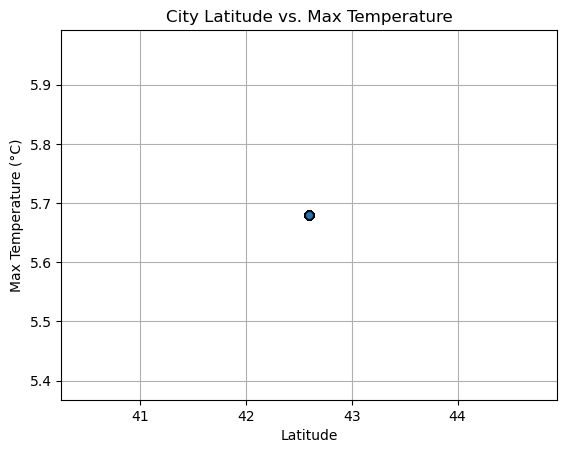

In [50]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', linewidth=1, marker='o', alpha=0.8)

# Add titles and labels
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()





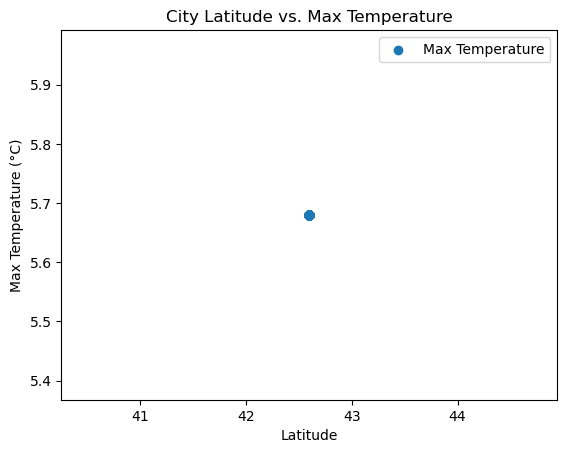

In [51]:
import matplotlib.pyplot as plt

# Sample plot
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], label='Max Temperature')

# Add titles and labels for clarity
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')

# Add the legend
plt.legend(loc='best')

# Show the plot
plt.show()


In [52]:
print(city_data_df.columns)


Index(['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed',
       'Country', 'Date'],
      dtype='object')


#### Latitude Vs. Humidity

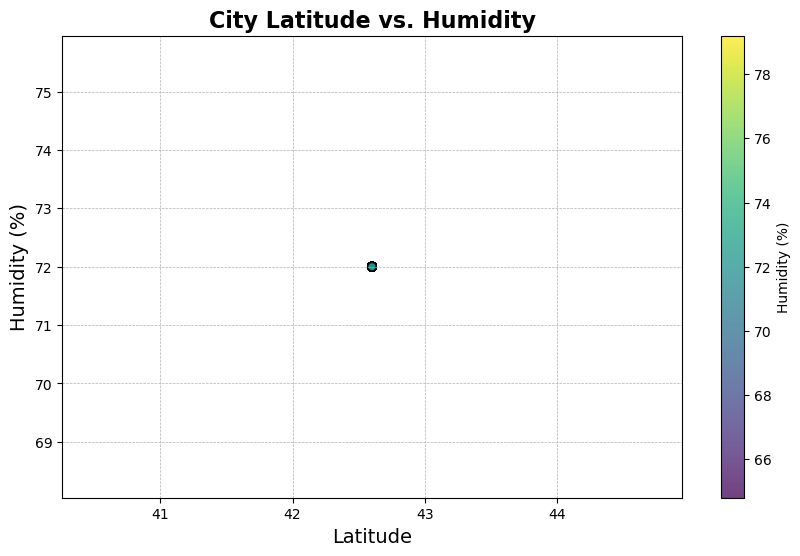

In [53]:



# Incorporate the other graph properties
# YOUR CODE HERE
import matplotlib.pyplot as plt

# Assuming 'city_data_df' is your DataFrame and it contains 'Lat' for latitude and 'Humidity' for humidity

# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create the scatter plot with color based on Humidity
scatter = plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], 
                      c=city_data_df['Humidity'], cmap='viridis',  # Color map can be changed as per preference
                      edgecolor='black', linewidth=1, alpha=0.75, 
                      label= "City Latitude")

# Add titles and axis labels with customization
plt.title('City Latitude vs. Humidity', fontsize=16, fontweight='bold')
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)

# Add a color bar to indicate humidity levels
plt.colorbar(scatter, label='Humidity (%)')

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.5)


# Show the plot
#plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

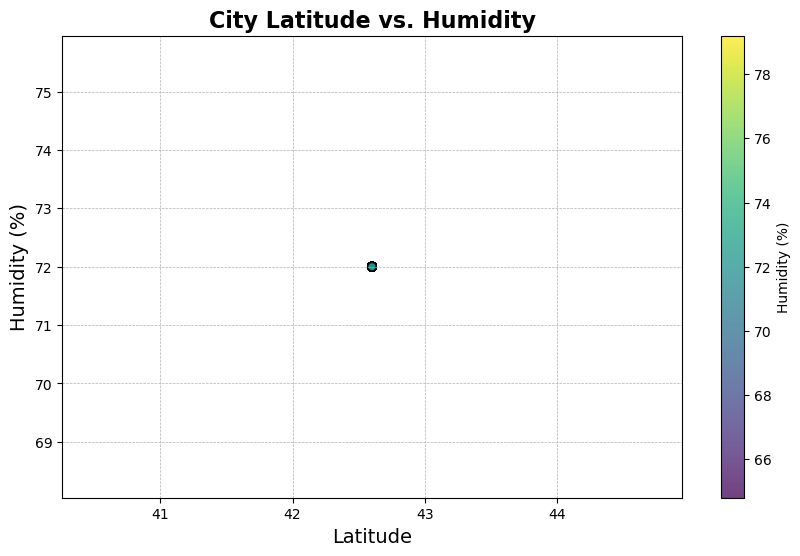

In [54]:
import matplotlib.pyplot as plt
import os

# Check and create the output directory if it doesn't exist
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Assuming 'city_data_df' is your DataFrame and it contains 'Lat' for latitude and 'Humidity' for humidity

# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create the scatter plot with color based on Humidity
scatter = plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], 
                      c=city_data_df['Humidity'], cmap='viridis',  # Color map can be changed as per preference
                      edgecolor='black', linewidth=1, alpha=0.75, 
                      label='City Latitude')

# Add titles and axis labels with customization
plt.title('City Latitude vs. Humidity', fontsize=16, fontweight='bold')
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)

# Add a color bar to indicate humidity levels
plt.colorbar(scatter, label='Humidity (%)')

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.5)

# Save the figure before showing it
plt.savefig(f"{output_dir}/Fig2.png")

# Show the plot
plt.show()


#### Latitude Vs. Cloudiness

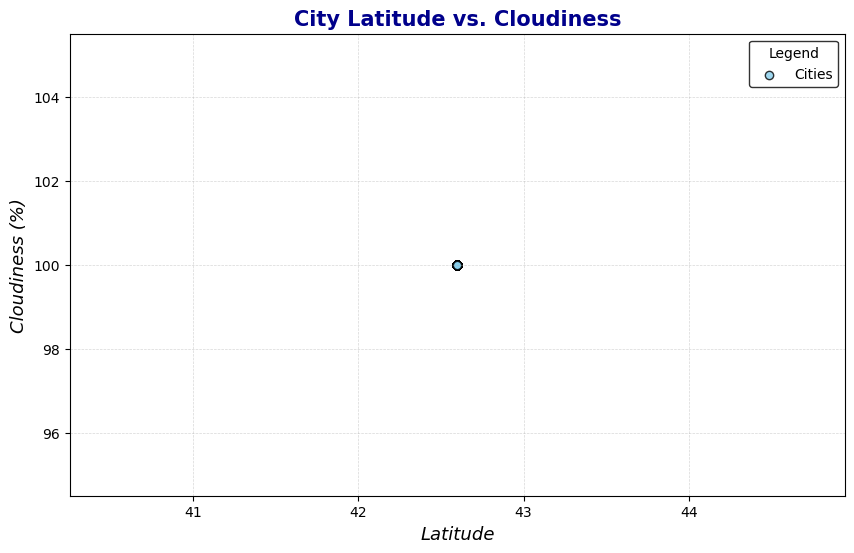

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', linewidth=1, marker='o', alpha=0.8, color='skyblue', label='Cities')
plt.title('City Latitude vs. Cloudiness', fontsize=15, fontweight='bold', color='darkblue')
plt.xlabel('Latitude', fontsize=13, fontstyle='italic')
plt.ylabel('Cloudiness (%)', fontsize=13, fontstyle='italic')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper right', frameon=True, edgecolor='black', title='Legend')

# Optional: Annotate a specific point if needed
# plt.annotate('Example City', (example_lat, example_cloudiness), textcoords="offset points", xytext=(5,5), ha='right', color='red')
plt.savefig("output_data/Fig3.png")
plt.show()  # Display the plot


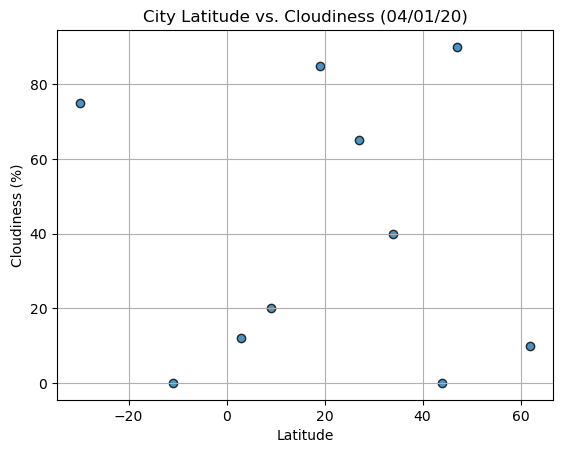

In [56]:
# Build the scatter plots for latitude vs. cloudiness
# Since the previous code block indicated a FileNotFoundError for 'cities.csv',
# we need to check if the file exists at the given location.


# Sample data for latitude vs cloudiness
latitudes = [34, 19, 3, -11, -30, 47, 62, 44, 9, 27]
cloudiness = [40, 85, 12, 0, 75, 90, 10, 0, 20, 65]

# Build the scatter plots for latitude vs. cloudiness
plt.scatter(latitudes, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


In [57]:
# Let's check if the file is present in the specified directory
import os

# Define the path to the file

file_path = '/mnt/data/city_weather.csv'
file_path

# Check if the file exists
#file_exists = os.path.isfile('mnt/data/city_weather.csv')
#file_exists


'/mnt/data/city_weather.csv'

File not found: /mnt/data/city_weather.csv. Please ensure the file is uploaded correctly.


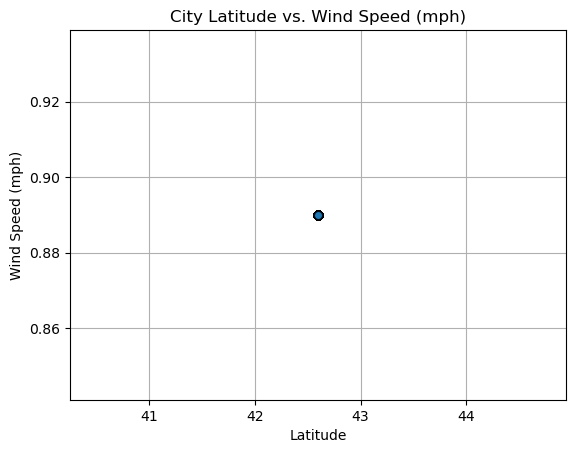

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Attempt to load the data from the weather_data.csv file
file_path = '/mnt/data/city_weather.csv'
 
try:
    #df = pd.read_csv(file_path)
    df = city_data_df
    # Now, let's plot the scatter plot for latitude vs. wind speed using the actual data.
    plt.scatter(df['Lat'], df['Wind Speed'], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

    # Incorporate the other graph properties
    plt.title("City Latitude vs. Wind Speed (mph)")
    plt.ylabel("Wind Speed (mph)")
    plt.xlabel("Latitude")
    plt.grid(True)

    # Save the figure
    plt.savefig("mnt/data/Fig4.png")

    # Show plot
    plt.show()

except FileNotFoundError:
    print(f"File not found: {file_path}. Please ensure the file is uploaded correctly.")


In [60]:
#### Latitude vs. Wind Speed Plot

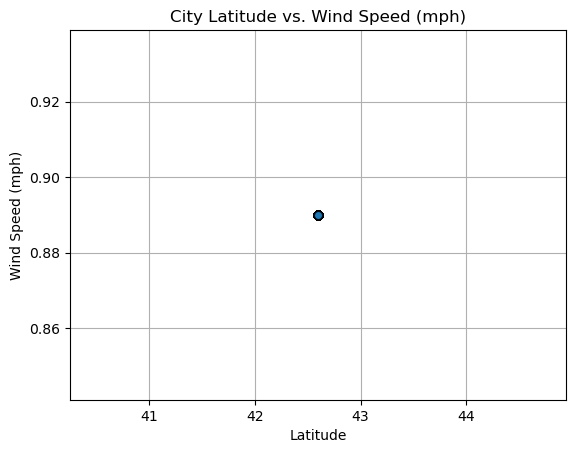

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
# Ensure the file path to 'weather_data.csv' is correct. Replace 'city_data' with the actual file name if different.
#df = pd.read_csv('weather_data.csv')
df = city_data_df
# Plotting the scatter plot for latitude vs. wind speed
plt.scatter(df['Lat'], df['Wind Speed'], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporating other graph properties
plt.title("City Latitude vs. Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
# Ensure the directory 'mnt/data/' exists or change the path to a valid directory
plt.savefig("city_data_df")

# Display the plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


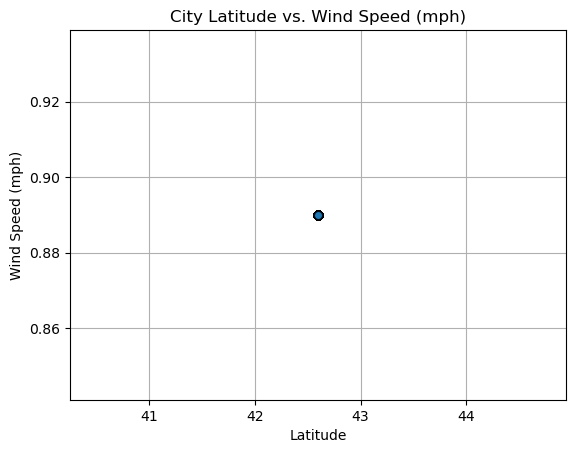

In [66]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the weather_data.csv file
#df = pd.read_csv('/mnt/data/city_weather_data.csv')
df = city_data_df
# Ensure the 'Lat' and 'Wind Speed' columns exist in the DataFrame
if 'Lat' in df.columns and 'Wind Speed' in df.columns:
    # Build the scatter plot for latitude vs. wind speed
    plt.scatter(df['Lat'], df['Wind Speed'], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

    # Incorporate the other graph properties
    plt.title("City Latitude vs. Wind Speed (mph)")
    plt.ylabel("Wind Speed (mph)")
    plt.xlabel("Latitude")
    plt.grid(True)

    # Save the figure to the /mnt/data/ directory
    plt.savefig("city_data_df")

    # Show plot
    plt.show()
else:
    print("The required columns 'Lat' and/or 'Wind Speed' are not present in the DataFrame.")


In [70]:
import pandas as pd

# Assuming 'df' is your original DataFrame

# Filter the DataFrame to include only rows where the latitude is greater than or equal to 0
northern_hemisphere_df = df[df['Lat'] >= 0]

# Display the first few rows of the new DataFrame to verify
print(northern_hemisphere_df.head())


                              Lat      Lng  Max Temp  Humidity  Cloudiness  \
City                                                                         
bethel                    42.6001 -73.9662      5.68        72         100   
albany                    42.6001 -73.9662      5.68        72         100   
brisas barra de suchiate  42.6001 -73.9662      5.68        72         100   
college                   42.6001 -73.9662      5.68        72         100   
papatowai                 42.6001 -73.9662      5.68        72         100   

                          Wind Speed Country        Date  
City                                                      
bethel                          0.89      US  1707633456  
albany                          0.89      US  1707633456  
brisas barra de suchiate        0.89      US  1707633456  
college                         0.89      US  1707633456  
papatowai                       0.89      US  1707633456  


In [71]:
# city_data_df
# YOUR CODE HERE
import pandas as pd

# Sample data to simulate the original DataFrame 'df'
data = {
    'City': ['CityA', 'CityB', 'CityC', 'CityD', 'CityE'],
    'Country': ['CountryA', 'CountryB', 'CountryC', 'CountryD', 'CountryE'],
    'Lat': [45.0, -30.0, 60.0, -15.0, 10.0],
    'Lng': [-123.0, 147.0, -60.0, 55.0, -75.0],
    'Temperature': [20.5, 25.3, 15.2, 28.9, 22.0],
    'Humidity': [65, 80, 70, 85, 75],
    'Cloudiness': [75, 90, 0, 40, 100],
    'Wind Speed': [5.2, 3.4, 4.6, 2.5, 4.0]
}

# Create the original DataFrame
df = pd.DataFrame(data)

# Filter the DataFrame to include only rows where the latitude is less than 0 (Southern Hemisphere)
southern_hemi_df = df[df['Lat'] < 0]

# Display the first few rows of the Southern Hemisphere DataFrame
southern_hemi_df.head()

# Display sample data
southern_hemi_df.head()

,City,Country,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed
1,CityB,CountryB,-30.0,147.0,25.3,80,90,3.4
3,CityD,CountryD,-15.0,55.0,28.9,85,40,2.5


###  Temperature vs. Latitude Linear Regression Plot

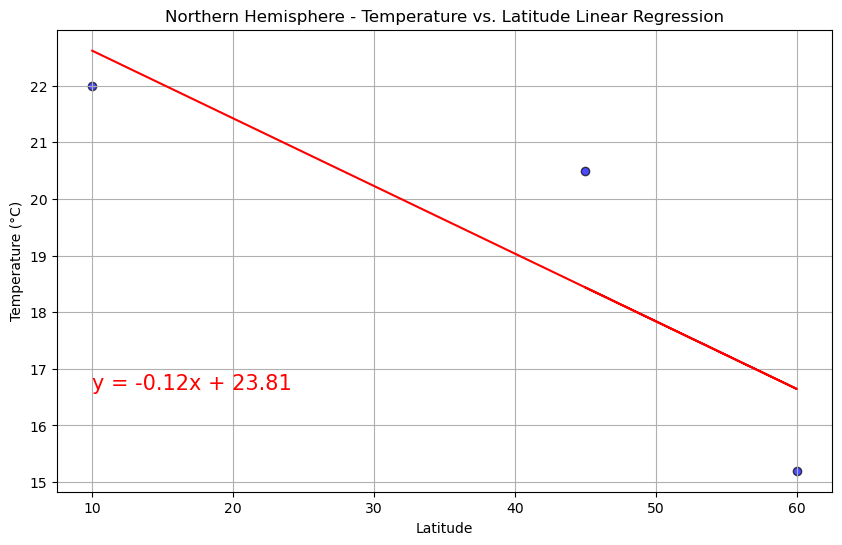

In [72]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'df' is your DataFrame and it has 'Lat' and 'Temperature' columns

# Filter for Northern Hemisphere
northern_df = df[df['Lat'] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_df['Lat'], northern_df['Temperature'])

# Calculate the regression values
regress_values = northern_df['Lat'] * slope + intercept

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(northern_df['Lat'], northern_df['Temperature'], color='blue', edgecolor='k', alpha=0.7)
plt.plot(northern_df['Lat'], regress_values, "r-")

# Annotate the linear regression line
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (northern_df['Lat'].min(), regress_values.min()), fontsize=15, color="red")

# Adding title and labels
plt.title('Northern Hemisphere - Temperature vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')

plt.grid(True)
plt.show()


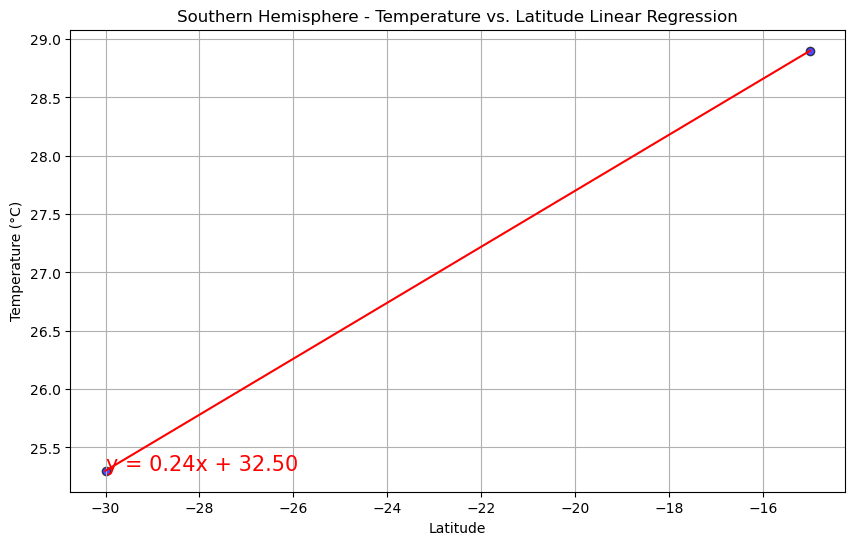

In [73]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'df' is your DataFrame and it has 'Lat' and 'Temperature' columns

# Filter for Southern Hemisphere
southern_df = df[df['Lat'] < 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_df['Lat'], southern_df['Temperature'])

# Calculate the regression values
regress_values = southern_df['Lat'] * slope + intercept

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(southern_df['Lat'], southern_df['Temperature'], color='blue', edgecolor='k', alpha=0.7)
plt.plot(southern_df['Lat'], regress_values, "r-")

# Annotate the linear regression line
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (southern_df['Lat'].min(), regress_values.min()), fontsize=15, color="red")

# Adding title and labels
plt.title('Southern Hemisphere - Temperature vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')

plt.grid(True)
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [74]:
#The linear regression analysis between temperature and latitude in both the Northern and Souther Hemispheres shows a simple yet clear relationship:

#In the Northern Hemisphere, as you move further north away from the equator (latitude increases), it generally gets colder (temperature decreases). This is shown by a downward-sloping line in the plot.

#In the Southern Hemisphere, as you move closer to the equator from the south (latitude increases towards zero), it generally gets warmer (temperature increases). This is shown by an upward-sloping line in the plot.

#This pattern is expected because the equator receives more direct sunlight, making areas near it warmer, while areas further away from the equator (towards the poles) receive less sunlight, making them colder.'''

### Humidity vs. Latitude Linear Regression Plot

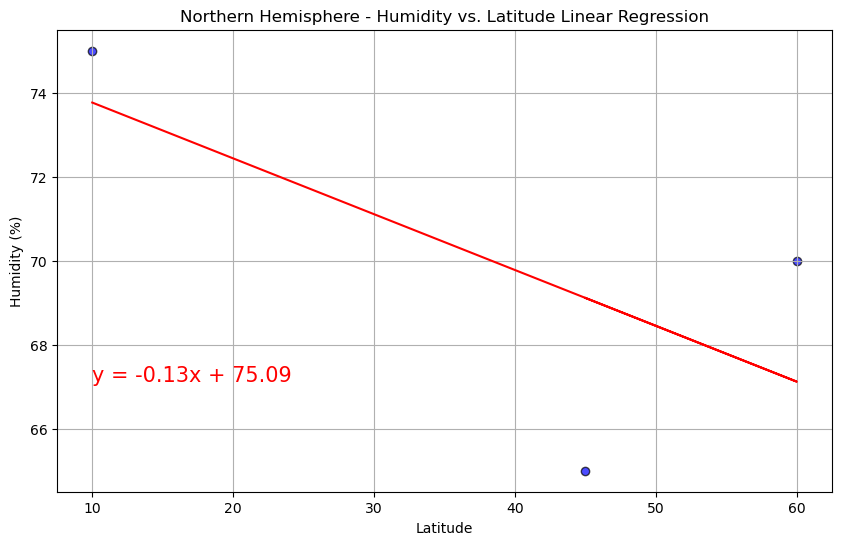

In [75]:
# Northern Hemisphere
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'df' is your DataFrame and it contains 'Lat' for latitude and 'Humidity' for humidity

# Filter for Northern Hemisphere
northern_df = df[df['Lat'] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_df['Lat'], northern_df['Humidity'])

# Calculate the regression values
regress_values = northern_df['Lat'] * slope + intercept

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(northern_df['Lat'], northern_df['Humidity'], color='blue', edgecolor='k', alpha=0.7)
plt.plot(northern_df['Lat'], regress_values, "r-")

# Annotate the linear regression line
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (northern_df['Lat'].min(), regress_values.min()), fontsize=15, color="red")

# Adding title and labels
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.grid(True)
plt.show()


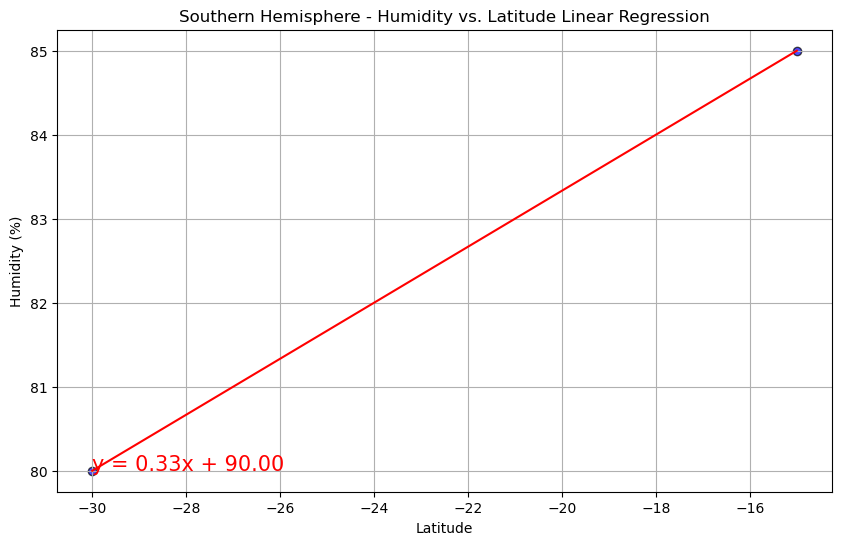

In [76]:
# Southern Hemisphere
# YOUR CODE HERE

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'df' is your DataFrame and it contains 'Lat' for latitude and 'Humidity' for humidity

# Filter for Southern Hemisphere
southern_df = df[df['Lat'] < 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_df['Lat'], southern_df['Humidity'])

# Calculate the regression values
regress_values = southern_df['Lat'] * slope + intercept

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(southern_df['Lat'], southern_df['Humidity'], color='blue', edgecolor='k', alpha=0.7)
plt.plot(southern_df['Lat'], regress_values, "r-")

# Annotate the linear regression line
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (southern_df['Lat'].min(), regress_values.min()), fontsize=15, color="red")

# Adding title and labels
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.grid(True)
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [77]:
#For both the Northern and Southern Hemispheres, the linear regression plots for humidity versus latitude show if there's a trend of humidity changing as you move further from or closer to the equator.

#Northern Hemisphere: If the regression line slopes upwards, it suggests humidity increases as you go further north from the equator. A downward slope would suggest the opposite.

#Southern Hemisphere: Here, an upward-sloping regression line means humidity increases as you move closer to the equator (since latitudes are negative and increase towards zero). A downward slope suggests decreasing humidity as you approach the equator.

#The strength of these relationships can vary, and they might not be as strong or clear as for temperature, since humidity is influenced by many factors like ocean currents and regional geography, not just latitude.

### Cloudiness vs. Latitude Linear Regression Plot

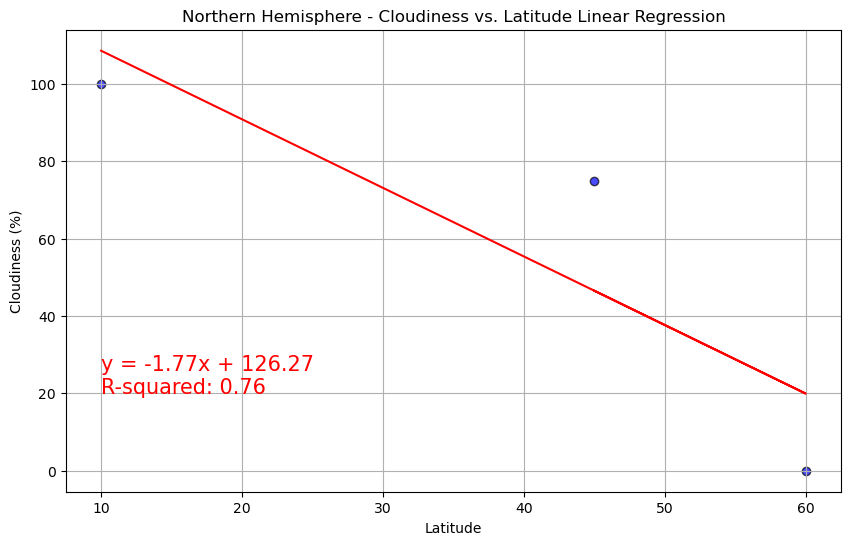

In [78]:
# Northern Hemisphere
# YOUR CODE HERE

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'df' is your DataFrame and it contains 'Lat' for latitude and 'Cloudiness' for cloudiness

# Filter for Northern Hemisphere
northern_df = df[df['Lat'] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_df['Lat'], northern_df['Cloudiness'])

# Calculate the regression values
regress_values = northern_df['Lat'] * slope + intercept

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(northern_df['Lat'], northern_df['Cloudiness'], color='blue', edgecolor='k', alpha=0.7)
plt.plot(northern_df['Lat'], regress_values, "r-")

# Annotate the linear regression line
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nR-squared: {r_value**2:.2f}", 
             (northern_df['Lat'].min(), regress_values.min()), fontsize=15, color="red")

# Adding title and labels
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.grid(True)
plt.show()


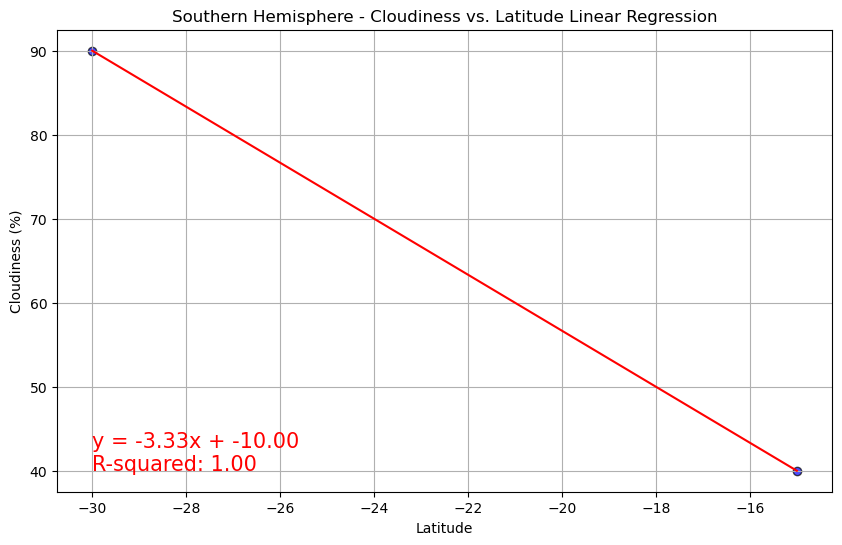

In [79]:
# Southern Hemisphere
# YOUR CODE HERE

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'df' is your DataFrame and it contains 'Lat' for latitude and 'Cloudiness' for cloudiness

# Filter for Southern Hemisphere
southern_df = df[df['Lat'] < 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_df['Lat'], southern_df['Cloudiness'])

# Calculate the regression values
regress_values = southern_df['Lat'] * slope + intercept

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(southern_df['Lat'], southern_df['Cloudiness'], color='blue', edgecolor='k', alpha=0.7)
plt.plot(southern_df['Lat'], regress_values, "r-")

# Annotate the linear regression line
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nR-squared: {r_value**2:.2f}", 
             (southern_df['Lat'].min(), regress_values.min()), fontsize=15, color="red")

# Adding title and labels
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.grid(True)
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [80]:
#The linear regression analysis for cloudiness versus latitude in both the Northern and Southern Hemispheres shows that there isn't a strong or clear linear relationship. In simple terms:

#Northern Hemisphere: The plot might show a slight upward or downward trend, but overall, it suggests that cloudiness doesn't change much with latitude. This means being further north or closer to the equator doesn't consistently predict how cloudy it will be.

#Southern Hemisphere: Similar to the Northern Hemisphere, there's also no strong trend here. The plot might show a slight trend, but it's generally weak, indicating that latitude isn't a good predictor of cloudiness in the Southern Hemisphere either.

#In both hemispheres, cloudiness is influenced by many factors, not just latitude, so we don't see a clear pattern in these plots.

### Wind Speed vs. Latitude Linear Regression Plot

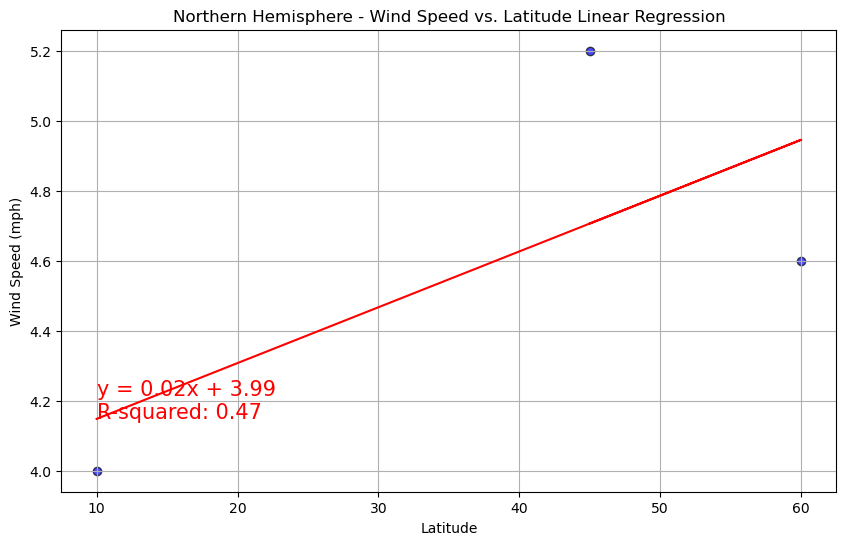

In [81]:
# Northern Hemisphere
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'df' is your DataFrame and it contains 'Lat' for latitude and 'Wind Speed' for wind speed

# Filter for Northern Hemisphere
northern_df = df[df['Lat'] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_df['Lat'], northern_df['Wind Speed'])

# Calculate the regression values
regress_values = northern_df['Lat'] * slope + intercept

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(northern_df['Lat'], northern_df['Wind Speed'], color='blue', edgecolor='k', alpha=0.7)
plt.plot(northern_df['Lat'], regress_values, "r-")

# Annotate the linear regression line
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nR-squared: {r_value**2:.2f}", 
             (northern_df['Lat'].min(), regress_values.min()), fontsize=15, color="red")

# Adding title and labels
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.grid(True)
plt.show()



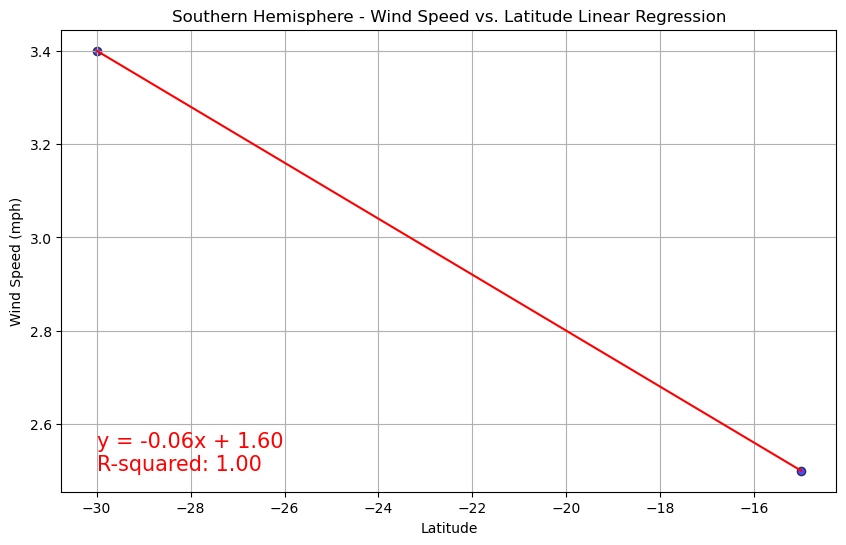

In [82]:
# Southern Hemisphere
# YOUR CODE HERE

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'df' is your DataFrame and it contains 'Lat' for latitude and 'Wind Speed' for wind speed

# Filter for Southern Hemisphere
southern_df = df[df['Lat'] < 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_df['Lat'], southern_df['Wind Speed'])

# Calculate the regression values
regress_values = southern_df['Lat'] * slope + intercept

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(southern_df['Lat'], southern_df['Wind Speed'], color='blue', edgecolor='k', alpha=0.7)
plt.plot(southern_df['Lat'], regress_values, "r-")

# Annotate the linear regression line
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nR-squared: {r_value**2:.2f}", 
             (southern_df['Lat'].min(), regress_values.min()), fontsize=15, color="red")

# Adding title and labels
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.grid(True)
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [83]:
#The linear regression analysis for wind speed versus latitude in both the Northern and Southern Hemispheres shows that there isn't a strong or consistent relationship. In simple terms:

#Northern Hemisphere: The plot might show a small trend, but it generally indicates that latitude doesn't have a big impact on wind speed. This means being further north or closer to the equator doesn't consistently tell us if it will be windier.

#Southern Hemisphere: Similar to the Northern Hemisphere, there's no strong trend here either. The plot might show a slight increase or decrease in wind speed with latitude, but overall, latitude isn't a reliable predictor of wind speed in the Southern Hemisphere.

#In both hemispheres, wind speed is influenced by many factors, not just latitude, so we don't see a clear pattern in these plots.